# STAT 207 Lab 10: Linear Regression + Logistic Regression - [25 total points] - Solutions

Due: Wednesday, April 14 11:59pm CST

We will conduct two case studies in this lab.

## <u>Case Study 1</u>: What Factors Predict the Number of Instagram Account Followers?
First, we are interested to learn more about what aspects of an Instagram account (both fake and real) are useful predictors of the number of *followers* that an Instagram account has. First, we will consider the following explanatory variables.
* the number of accounts someone *follows*
* whether the account is fake or real
* number of characters in the bio
* whether they have a profile picture or not
* number of words in name
* account type


## <u>Case Study 2</u>: What Factors Predict Whether an Instagram Account is Fake or Real?
Next, we are interested to learn more about what aspects of an Instagram account are useful in predicting whether an account is fake or real. First, we will consider the following explanatory variables.
* the number of accounts someone *follows*
* whether the account is fake or real
* number of characters in the bio
* whether they have a profile picture or not
* number of words in name
* number of *followers*

<u>Dataset Collection Information</u>: We will utilized a cleaned version of the fake instagram dataset that we used in the beginning of the class. I deleted some observations that were outliers (in terms of number of followers) and I deleted two accounts that had no followers. We can assume that this dataset is a **random sample** of all Instagram accounts.

<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## Preliminaries

### Imports

In [65]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Read in the fake_insta_cleaned.csv into a dataframe.

In [66]:
df = pd.read_csv("fake_insta_cleaned.csv")

In [67]:
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,76,6,225,356,real
4,yes,1,0,6,362,424,real


<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## <u>Case Study 1</u>: What Factors Predict the Number of Instagram Account Followers?


### 1. [1 pt] Create a linear regression model with the following variables. Then print the summary output table.
* <u>response variable</u>: number of followers
* <u>explanatory variables</u>:
 - the number of accounts someone *follows*
 - whether the account is fake or real
 - number of characters in the bio
 -whether they have a profile picture or not
  - number of words in name
  - account type

In [68]:
results = smf.ols('number_of_followers ~ number_of_follows+account_type+has_a_profile_pic+number_of_words_in_name+num_characters_in_bio', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     number_of_followers   R-squared:                       0.369
Model:                             OLS   Adj. R-squared:                  0.339
Method:                  Least Squares   F-statistic:                     12.41
Date:                 Wed, 14 Apr 2021   Prob (F-statistic):           1.75e-09
Time:                         16:49:33   Log-Likelihood:                -849.63
No. Observations:                  112   AIC:                             1711.
Df Residuals:                      106   BIC:                             1728.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  163.4064    111.065      1.471      0.144     -56.791     383.604
account_type[T.real]       415.7693    130.481      3.186      0.002     157.077     674.461
has_a_profile_pic[T.yes]  -130.1005    130.241     -0.999      0.320    -388.316     128.115
number_of_follows            0.2803      0.039      7.230      0.000       0.203       0.357
number_of_words_in_name    -31.1877     49.601     -0.629      0.531    -129.526      67.151
num_characters_in_bio        0.6772      1.514      0.447      0.656      -2.325       3.679
==============================================================================
Omnibus:                      111.596   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.797
Skew:                           3.531   Prob(JB):                    3.22e-258
Kurtosis:                      17.291   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. [5 pt] Check the conditions for inference for this model.

Condition 1: Linearity Condition
Because the distribution of points in the plot below are *ROUGHLY* evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met.

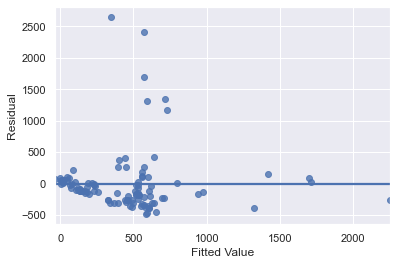

In [69]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 2: Constant Variability of residuals
Because the y-axis spread of points in the plot below change as we move from left to right, we can say that this condition is not met.

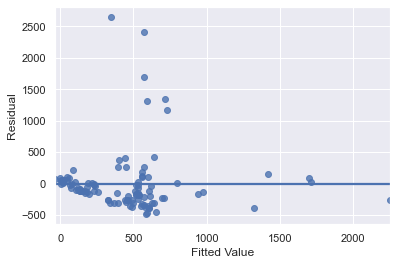

In [70]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 3: Normality of Residuals 
Because the histogram of the residuals is skewed right heavily, the condition of residuals being normally distributed is not met.

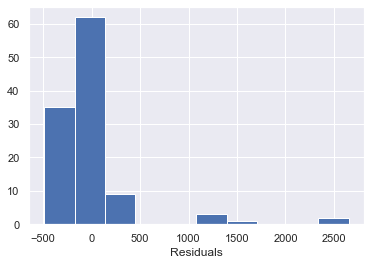

In [71]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

Condition 4: Independence of Residuals condition
We can verify at the very least that the data is randomly sampled and the sample size is less than 10% of all instagram accounts.

Condition 5: No-Multicollinearity Condition
We can see that none of the explanitory variables have a strong linear relationship, thus the multicollineaity condition is met.

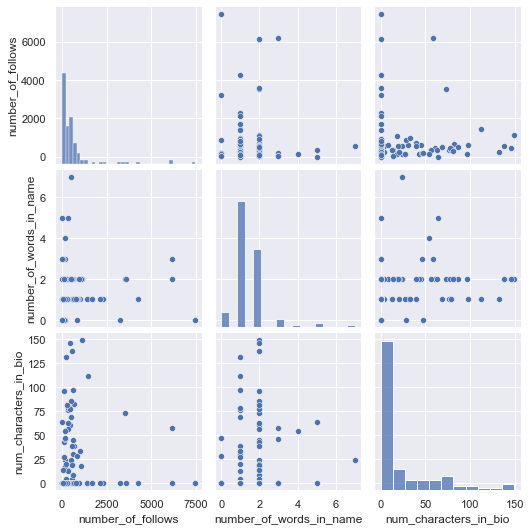

In [72]:
sns.pairplot(df[['number_of_follows','account_type','has_a_profile_pic','number_of_words_in_name','num_characters_in_bio']])
plt.show()

In [73]:
df[['number_of_follows','account_type','has_a_profile_pic','number_of_words_in_name','num_characters_in_bio']].corr()

,number_of_follows,number_of_words_in_name,num_characters_in_bio
number_of_follows,1.000000,-0.034764,0.016434
number_of_words_in_name,-0.034764,1.000000,0.207163
num_characters_in_bio,0.016434,0.207163,1.000000


### 3. [1.5 pt] Next, create a new variable in your dataframe that is the natural log of the number of followers variable. 

In [74]:
df['natural_log_followers']=np.log(df['number_of_followers'])
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,natural_log_followers
0,yes,1,30,35,488,604,real,6.190315
1,yes,5,64,3,35,6,real,3.555348
2,yes,2,82,319,328,668,real,5.793014
3,yes,1,76,6,225,356,real,5.416100
4,yes,1,0,6,362,424,real,5.891644


### 4. [1 pt] Now, create a new linear regression model with the following variables. Then print the summary output table.
* <u>response variable</u>: **ln(number of followers)**
* <u>explanatory variables</u>:
 - the number of accounts someone *follows*
 - whether the account is fake or real
 - number of characters in the bio
 -whether they have a profile picture or not
  - number of words in name
  - account type

In [75]:
results = smf.ols('natural_log_followers ~ number_of_follows+account_type+has_a_profile_pic+number_of_words_in_name+num_characters_in_bio', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     natural_log_followers   R-squared:                       0.629
Model:                               OLS   Adj. R-squared:                  0.612
Method:                    Least Squares   F-statistic:                     36.02
Date:                   Wed, 14 Apr 2021   Prob (F-statistic):           2.14e-21
Time:                           16:49:37   Log-Likelihood:                -140.43
No. Observations:                    112   AIC:                             292.9
Df Residuals:                        106   BIC:                             309.2
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.8065      0.198     19.273      0.000       3.415       4.198
account_type[T.real]         1.3512      0.232      5.823      0.000       0.891       1.811
has_a_profile_pic[T.yes]     0.6405      0.232      2.765      0.007       0.181       1.100
number_of_follows            0.0007   6.89e-05      9.622      0.000       0.001       0.001
number_of_words_in_name     -0.1631      0.088     -1.850      0.067      -0.338       0.012
num_characters_in_bio        0.0023      0.003      0.843      0.401      -0.003       0.008
==============================================================================
Omnibus:                       31.706   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.324
Skew:                           1.100   Prob(JB):                     5.36e-16
Kurtosis:                       6.198   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5 [2.5 pts] Check the conditions for inference for this new model. For each of your conditions, comment on whether this condition is now closer to being met than in the previous model.

Condition 1: Linearity Condition
Because the distribution of points in the plot below are *ROUGHLY* evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met.

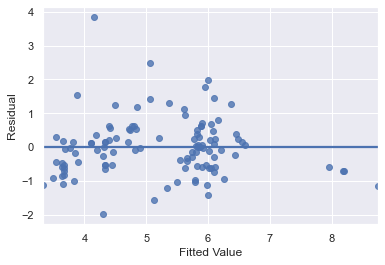

In [76]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 2: Constant Variability of residuals
Because the y-axis spread of points in the plot below change as we move from left to right, we can say that this condition is not met.

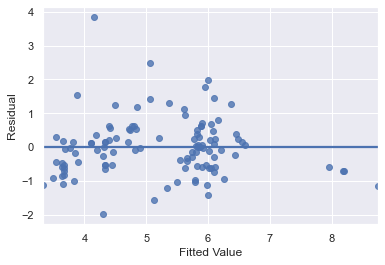

In [77]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 3: Normality of Residuals 
Because the histogram of the residuals is skewed right slightly, the condition of residuals being normally distributed is slightly not met.

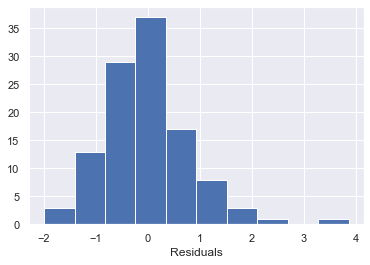

In [78]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

Condition 4: Independence of Residuals condition
We can verify at the very least that the data is randomly sampled and the sample size is less than 10% of all instagram accounts.

Condition 5: No-Multicollinearity Condition
We can see that none of the explanitory variables have a strong linear relationship, thus the multicollineaity condition is met.

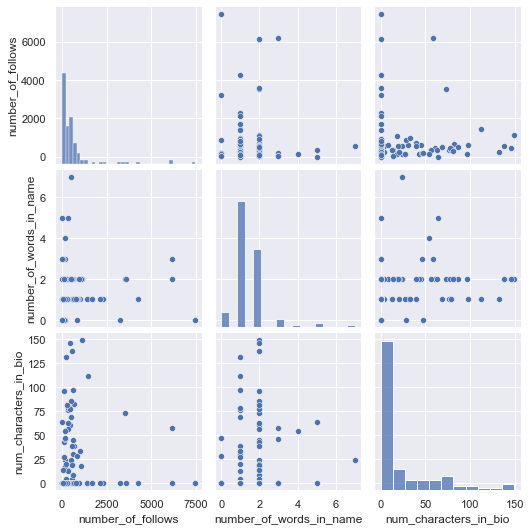

In [79]:
sns.pairplot(df[['number_of_follows','account_type','has_a_profile_pic','number_of_words_in_name','num_characters_in_bio']])
plt.show()

In [80]:
df[['number_of_follows','account_type','has_a_profile_pic','number_of_words_in_name','num_characters_in_bio']].corr()

,number_of_follows,number_of_words_in_name,num_characters_in_bio
number_of_follows,1.000000,-0.034764,0.016434
number_of_words_in_name,-0.034764,1.000000,0.207163
num_characters_in_bio,0.016434,0.207163,1.000000


### 6. [1 pt] Ariana Grande (currently) has 4776 posts, follows 781 accounts, has two words in the account name, is a real account, has 32 characters in her bio, and has a profile picture. Use this regression equation to predict how many *followers* she has.

In [82]:
results_log = results.predict(exog=dict(number_of_posts=4776, account_type='real', has_a_profile_pic='yes', num_characters_in_bio=32, number_of_words_in_name=2, number_of_follows=781))

In [83]:
print(np.e**results_log)

0    429.469404
dtype: float64


According to my prediction based off the regression equation, Ariana Grande should have about 429 followers on instagram.

### 7  [1 pt] Ariana Grande (currently) actually has about 230,000,000 followers on Instagram. Calculate the residual of this prediction.

In [84]:
print(np.e**results_log - 230000000)

0   -2.299996e+08
dtype: float64


### 8. We have a hunch that at least one of the population slopes for num_characters_in_bio or number_of_words_in_name is non-zero in the population linear regression model with the same set of variables.
* <u>response variable</u>: **ln(number of followers)**
* <u>explanatory variables</u>:
 - the number of accounts someone *follows*
 - whether the account is fake or real
 - number of characters in the bio
 -whether they have a profile picture or not
  - number of words in name
  - account type
  
### We will conduct a hypothesis test that will test this claim.

#### 8.1 [1 pt] Set up your hypotheses here. Make sure you label what any population parameters are that you use.

Ho: Slope(num_characters_in_bio) = Slope(number_of_words_in_name) = 0
Ha: At least one of the population slopes is non-zero.

#### 8.2 [2 pt] Calculate the p-value for this test (however you like).

In [85]:
test_stat = 36.02

In [86]:
pvalue = 1-f.cdf(test_stat, dfn = 2, dfd = df.shape[0] - 2 - 1)
print(pvalue)

9.795497746267756e-13


#### 8.3 [1 pt] Use this p-value to make a conclusion using a significance level of $\alpha=0.01$.

Since the pvalue < 0.01, we reject the null hypothesis. Thus there is sufficient evidence to suggest that at least one of the two population slopes in the model is non-zero. 

<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## <u>Case Study 2</u>: What Factors Predict Whether an Instagram Account is Fake or Real?

Now, we are interested in creating a logistic regression model that predicts whether an account is fake.

### 9. [1 pt] First, create a new variable y in your dataframe that is equal to 1 when the account is fake, and equal to 0 when the account is real.


In [87]:
df['y']=df['account_type'].map({'real':0,'fake':1})
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,natural_log_followers,y
0,yes,1,30,35,488,604,real,6.190315,0
1,yes,5,64,3,35,6,real,3.555348,0
2,yes,2,82,319,328,668,real,5.793014,0
3,yes,1,76,6,225,356,real,5.416100,0
4,yes,1,0,6,362,424,real,5.891644,0


### 10.  [1.5 pt]  Now, create a logistic regression model which has the following variables. Then print the summary output table.
* <u>response variable</u>: account type
* <u>explanatory variables</u>:
    * the number of accounts someone *follows*
    * whether the account is fake or real
    * number of characters in the bio
    * whether they have a profile picture or not
    * number of words in name
    * number of *followers*
    
Remember, the level of the account type that we are interested in predicting the probability of is 'fake.'

In [88]:
results = smf.logit(formula='y ~ number_of_follows+number_of_followers+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=df).fit()
results.summary()

         Current function value: 0.125713
         Iterations: 35


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  112
Model:                          Logit   Df Residuals:                      106
Method:                           MLE   Df Model:                            5
Date:                Wed, 14 Apr 2021   Pseudo R-squ.:                  0.8185
Time:                        16:50:11   Log-Likelihood:                -14.080
converged:                      False   LL-Null:                       -77.561
Covariance Type:            nonrobust   LLR p-value:                 1.050e-25
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  104.2515   5.05e+05      0.000      1.000    -9.9e+05    9.91e+05
has_a_profile_pic[T.yes]   -99.8172   5.05e+05     -0.000      1.000   -9.91e+05     9.9e+05
number_of_follows            0.0091      0.003      3.376      0.001       0.004       0.014
number_of_followers         -0.0280      0.009     -3.194      0.001      -0.045      -0.011
number_of_words_in_name     -1.1747      0.559     -2.103      0.035      -2.269      -0.080
num_characters_in_bio       -0.1103      0.044     -2.496      0.013      -0.197      -0.024
============================================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 11.  [1 pt]  Use this model to predict the probability that Ariana Grande's Instagram account is fake.
<u>Remember</u>: This account (currently) has
* 4776 posts, 
* follows 781 accounts, 
* has two words in the account name,
* has 32 characters in her bio, 
* has a profile picture, and
* has 230,000,000 followers.

In [91]:
results.predict(exog=dict(number_of_posts=4776, account_type='real', has_a_profile_pic='yes', num_characters_in_bio=32, number_of_words_in_name=2, number_of_follows=781, number_of_followers=230000000))

0    0.0
dtype: float64

### 12.  [1.5 pt]  If we were to increase the number of followers of an account by 1, by what *multiple* would we expect the odds of this account being fake to change? Would the odds decrease or increase?

In [92]:
results.predict(exog=dict(number_of_posts=4776, account_type='real', has_a_profile_pic='yes', num_characters_in_bio=32, number_of_words_in_name=2, number_of_follows=781, number_of_followers=230000001))

0    0.0
dtype: float64

We would expect the odds to decrease by about 0.0280. 

### 13. [3 pt] Create a 99% confidence interval for the population <u>odds multiplier</u>  that corresponds to the number of characters in the bio (ie. $e^{\beta_3}$).

In [97]:
point_estimate=(-0.1103)
print('Point Estimate, ', point_estimate)

Point Estimate,  -0.1103


In [98]:
standard_error=(0.044)
print('Standard Error, ', standard_error)

Standard Error,  0.044


In [99]:
critical_value=norm.ppf(0.995)
print("Critical Value", critical_value)

Critical Value 2.5758293035489004


In [101]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error
print ('99% Confidence Interval for Number of Characters in Bio Slope: ', lower_bound, upper_bound)

99% Confidence Interval for Number of Characters in Bio Slope:  -0.2236364893561516 0.0030364893561516115
